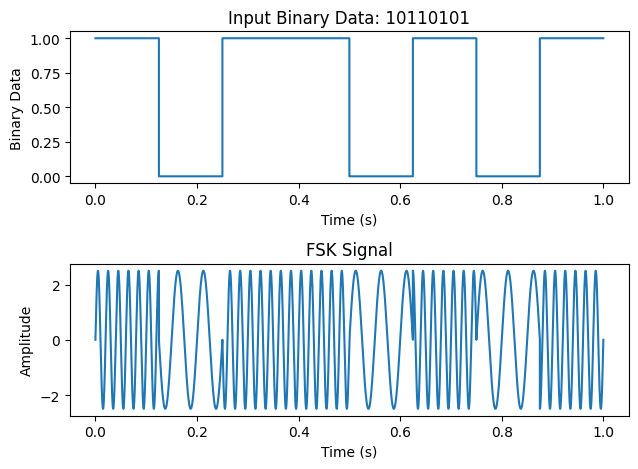

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling frequency and the time axis
fs = 100000
t = np.linspace(0, 1, 4*fs)

# Define the input binary data
data_input = np.array([1, 0, 1, 1])

# Convert the input binary data to a string and remove the commas
data_input_str = ''.join(map(str, data_input))

# Generate the square wave for the input binary data
data_input_square = np.repeat(data_input, fs)

# Generate the FSK signal
f1 = 50
f2 = 20
amplitude = 2.5
fsk_signal = np.zeros(len(t))
for i in range(len(data_input)):
    if data_input[i] == 1:
        fsk_signal[i*fs:(i+1)*fs] = amplitude * np.sin(2*np.pi*f1*t[i*fs:(i+1)*fs])
    else:
        fsk_signal[i*fs:(i+1)*fs] = amplitude * np.sin(2*np.pi*f2*t[i*fs:(i+1)*fs])

# Resize the time axis to match the size of the FSK signal
t_resized = np.resize(t, len(fsk_signal))

# Plot the input binary data and the FSK signal
plt.subplot(2, 1, 1)
plt.plot(t_resized, data_input_square, drawstyle='steps')
plt.xlabel('Time (s)')
plt.ylabel('Binary Data')
plt.title('Input Binary Data: ' + data_input_str)

plt.subplot(2, 1, 2)
plt.plot(t_resized, fsk_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('FSK Signal')

plt.tight_layout()
plt.show()

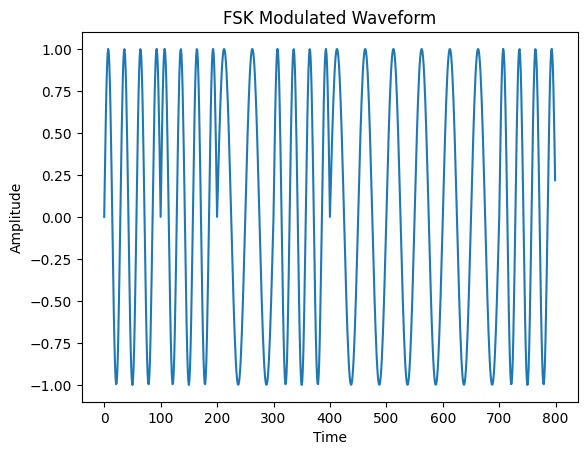

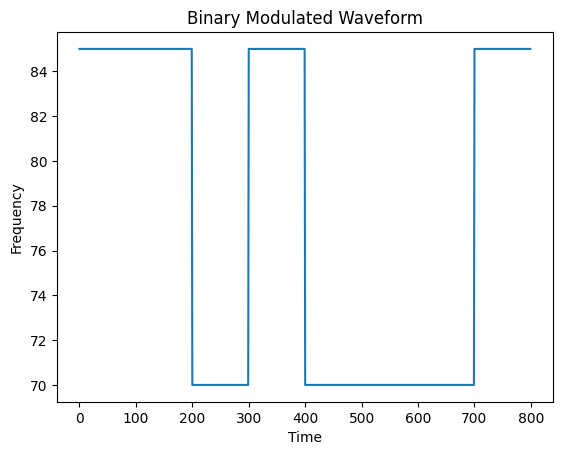

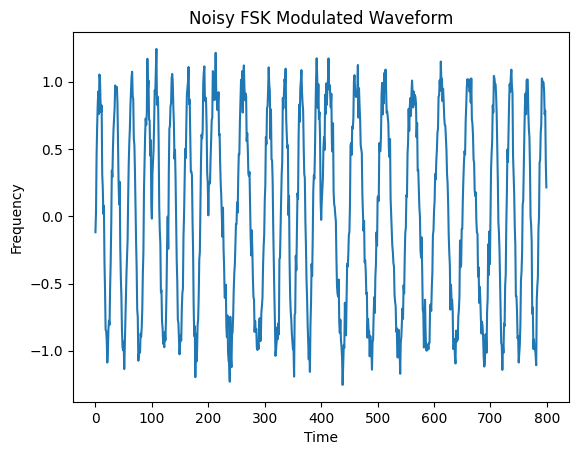

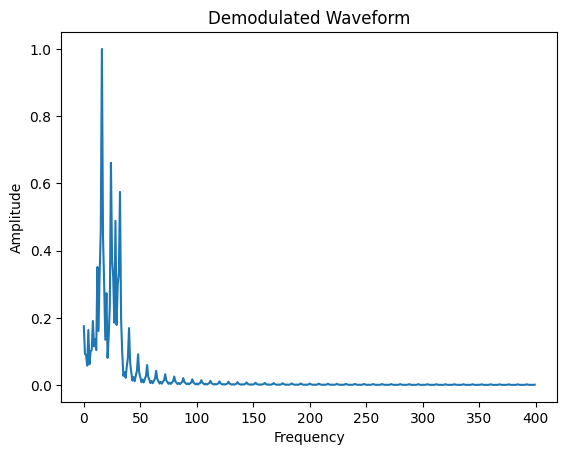

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Define FSK parameters
Fs = 1000  # Sampling frequency
fc = 50  # Carrier frequency
f1 = 35  # Frequency for binary 1
f2 = 20  # Frequency for binary 0
Td = 0.1  # Bit duration
sym_len = 100  # Number of symbols
sym = 8  # Number of bits

# Generate binary data
rand_n = np.random.rand(sym)
rand_n[np.where(rand_n >= 0.5)] = 1
rand_n[np.where(rand_n <= 0.5)] = 0
sig = np.zeros(int(sym*sym_len))
for i in range(sym):
    if rand_n[i] == 1:
        sig[i*int(sym_len):(i+1)*int(sym_len)] = np.sin(2*np.pi*f1*np.arange(0, Td, 1/Fs))
    else:
        sig[i*int(sym_len):(i+1)*int(sym_len)] = np.sin(2*np.pi*f2*np.arange(0, Td, 1/Fs))

# Plot binary data waveform
plt.figure()
plt.plot(sig)
plt.title('FSK Modulated Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Modulate binary data using FSK
f = np.zeros(int(sym*sym_len))
for i in range(sym):
    if rand_n[i] == 1:
        f[i*int(sym_len):(i+1)*int(sym_len)] = fc + f1
    else:
        f[i*int(sym_len):(i+1)*int(sym_len)] = fc + f2

# Plot FSK modulated waveform
plt.figure()
plt.plot(f)
plt.title('Binary Modulated Waveform')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Add noise to FSK modulated waveform
noise = np.random.normal(0, 0.1, len(sig))
f_noisy = sig + noise

# Plot noisy FSK modulated waveform
plt.figure()
plt.plot(f_noisy)
plt.title('Noisy FSK Modulated Waveform')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Demodulate FSK modulated waveform
demod = np.zeros(int(sym*sym_len))
for i in range(sym):
    if rand_n[i] == 1:
        demod[i*int(sym_len):(i+1)*int(sym_len)] = np.sin(2*np.pi*f1*np.arange(0, Td, 1/Fs))
    else:
        demod[i*int(sym_len):(i+1)*int(sym_len)] = np.sin(2*np.pi*f2*np.arange(0, Td, 1/Fs))
demod_f = np.fft.fft(demod)
f_noisy_f = np.fft.fft(f_noisy)
demod_f = demod_f[:int(len(demod_f)/2)]
f_noisy_f = f_noisy_f[:int(len(f_noisy_f)/2)]
demod_f = np.abs(demod_f)
f_noisy_f = np.abs(f_noisy_f)
demod_f = demod_f/np.max(demod_f)
f_noisy_f = f_noisy_f/np.max(f_noisy_f)

# Plot demodulated waveform
plt.figure()
plt.plot(demod_f)
plt.title('Demodulated Waveform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()